In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datasets_path = '/content/drive/MyDrive/DataMining/CP3_Datasets/'

# EDA

* Let's read and store all the csv files.

In [ ]:
deliveries = pd.read_csv(datasets_path+'deliveries.csv')
matches = pd.read_csv(datasets_path+'matches.csv')
points_table = pd.read_csv(datasets_path+'points_table.csv')

 * **The WorldCup is in INDIA, I would like to analyze and find insights of all matches that occured in this tournament.**

In [ ]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
deliveries.shape

(17380, 22)

In [ ]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [ ]:
matches.shape

(32, 18)

In [ ]:
points_table.head()

,Ranking,Team,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate,Series Form,Next Match,For,Against
0,1,South Africa,7,6,1,0,0,12,2.290,LWWWW,"vs IND, AFG",2355/340.2,1588/343.0
1,2,India,6,6,0,0,0,12,1.405,WWWWW,"vs SL, SA, NED",1430/246.2,1320/300.0
2,3,Australia,6,4,2,0,0,8,0.970,LWWWW,"vs ENG, AFG, BAN",1745/285.2,1499/291.2
3,4,New Zealand,7,4,3,0,0,8,0.484,WWLLL,"vs PAK, SL",1964/329.1,1908/348.0
4,5,Pakistan,7,3,4,0,0,6,-0.024,LLLLW,"vs NZ, ENG",1884/330.5,1869/326.5


In [ ]:
points_table.shape

(10, 13)

# Data Visualization

### Analyzing Top 5 Run Scorers at Different Venues



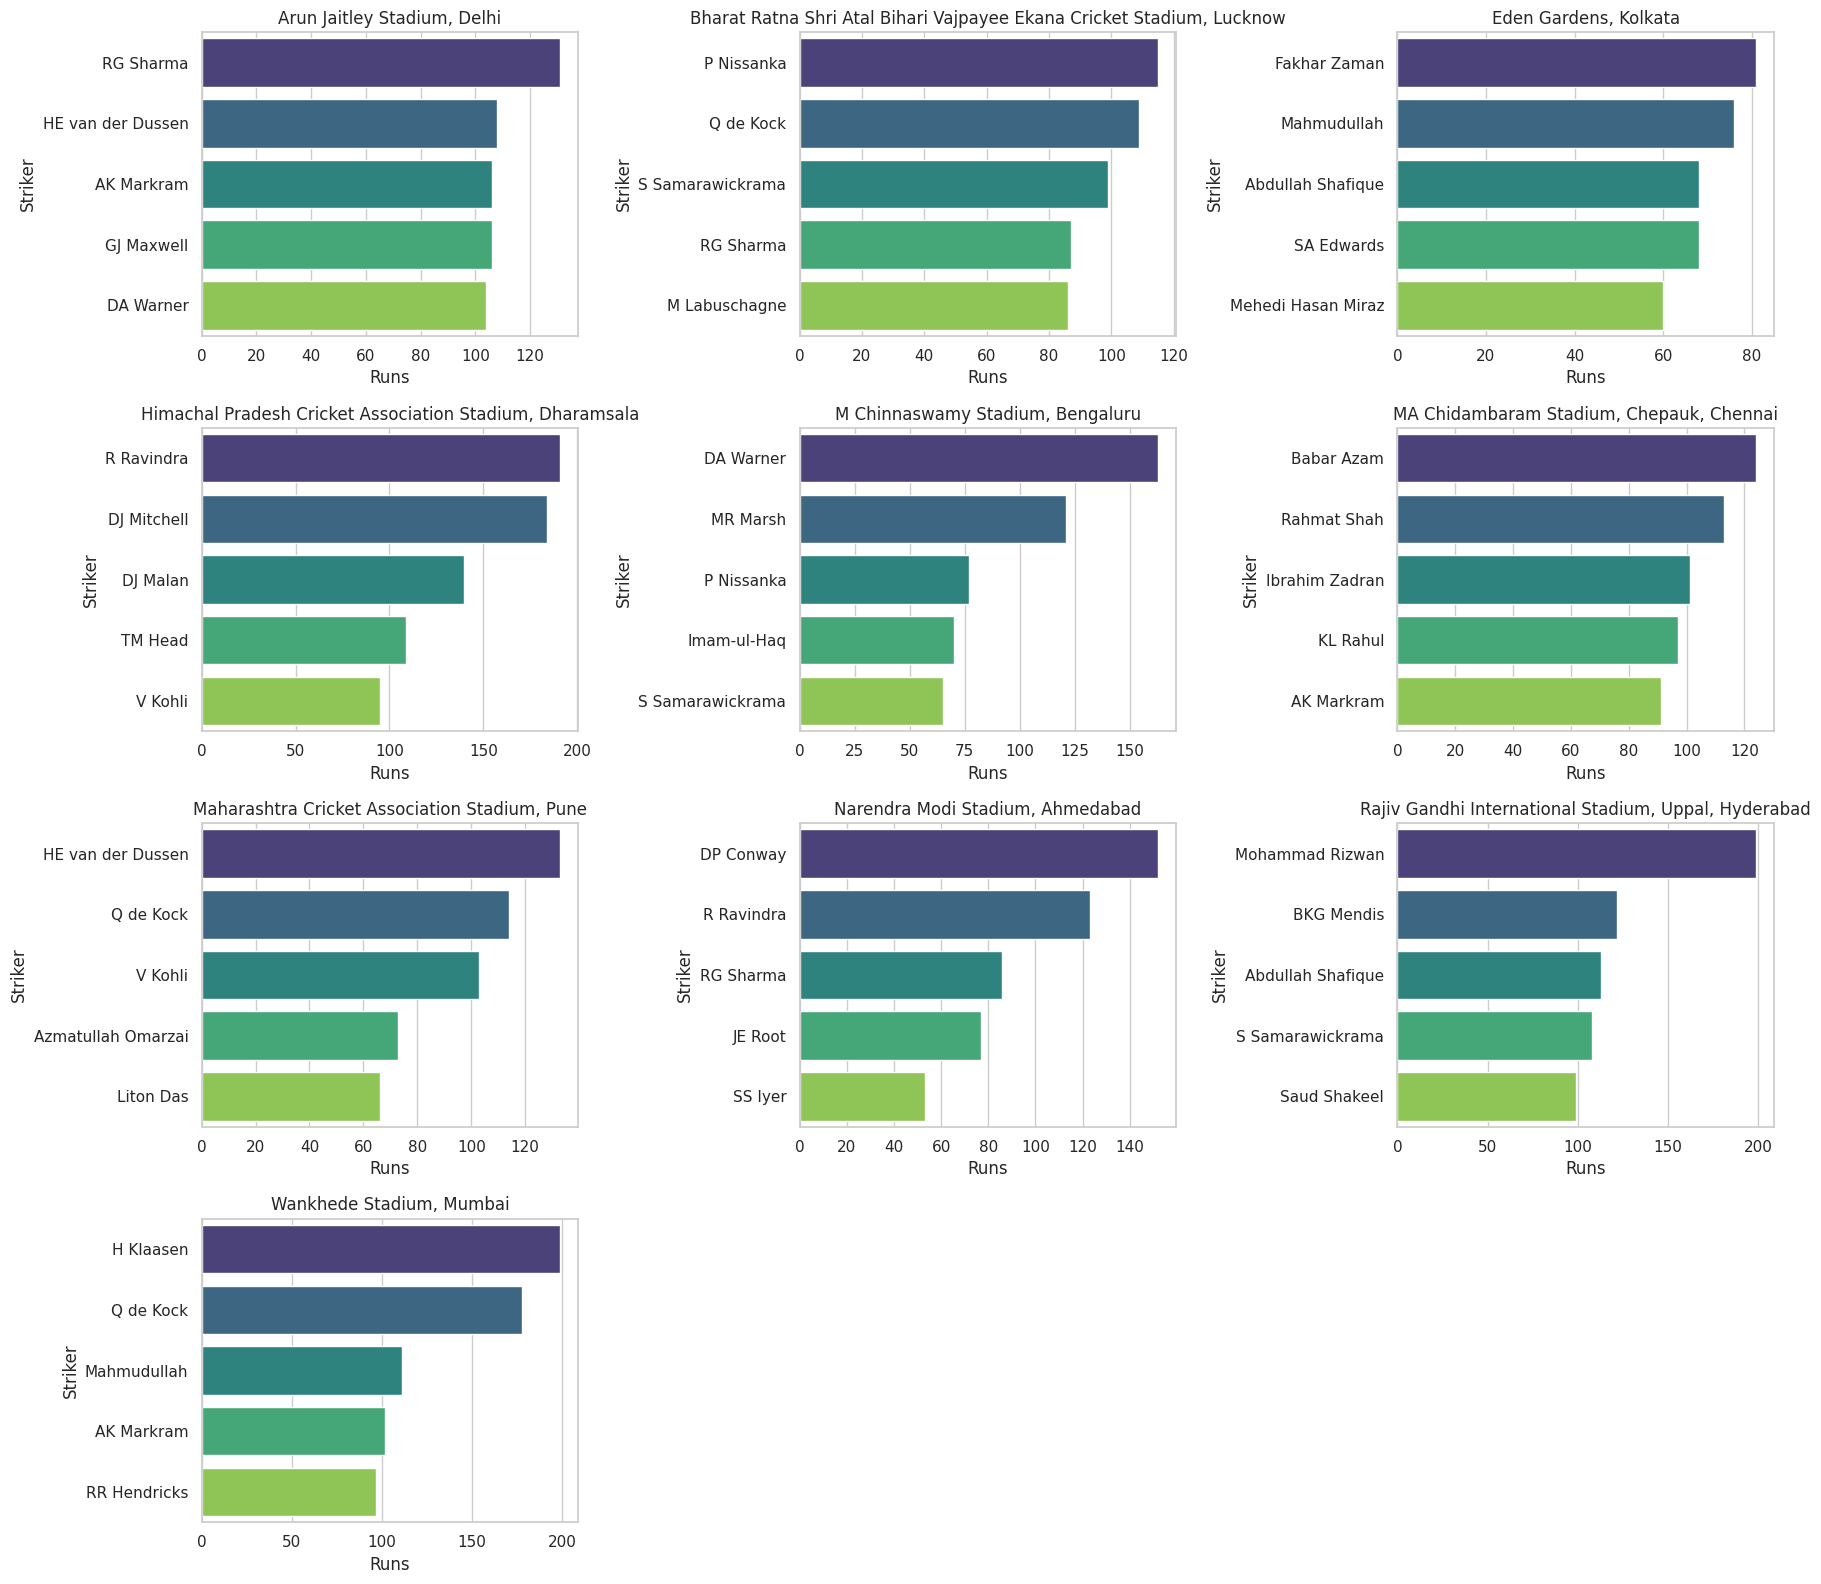

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

venue_wise_striker_runs = deliveries.groupby(['venue', 'striker'])['runs_off_bat'].sum().reset_index()
venue_wise_striker_runs_top5 = venue_wise_striker_runs.groupby('venue').apply(lambda x: x.nlargest(5, 'runs_off_bat')).reset_index(drop=True)
sns.set(style="whitegrid")

num_unique_venues = len(venue_wise_striker_runs_top5['venue'].unique())

num_rows = (num_unique_venues + 2) // 3

plt.figure(figsize=(18, 4 * num_rows))

for idx, venue in enumerate(venue_wise_striker_runs_top5['venue'].unique()):
    venue_data = venue_wise_striker_runs_top5[venue_wise_striker_runs_top5['venue'] == venue]
    plt.subplot(num_rows, 3, idx + 1)

    sns.barplot(x='runs_off_bat', y='striker', data=venue_data, palette='viridis')
    plt.title(venue)
    plt.xlabel('Runs')
    plt.ylabel('Striker')
    plt.tight_layout()

# Show the plot
plt.show()


### Analyzing Top 5 Wicket tacker at Different Venues

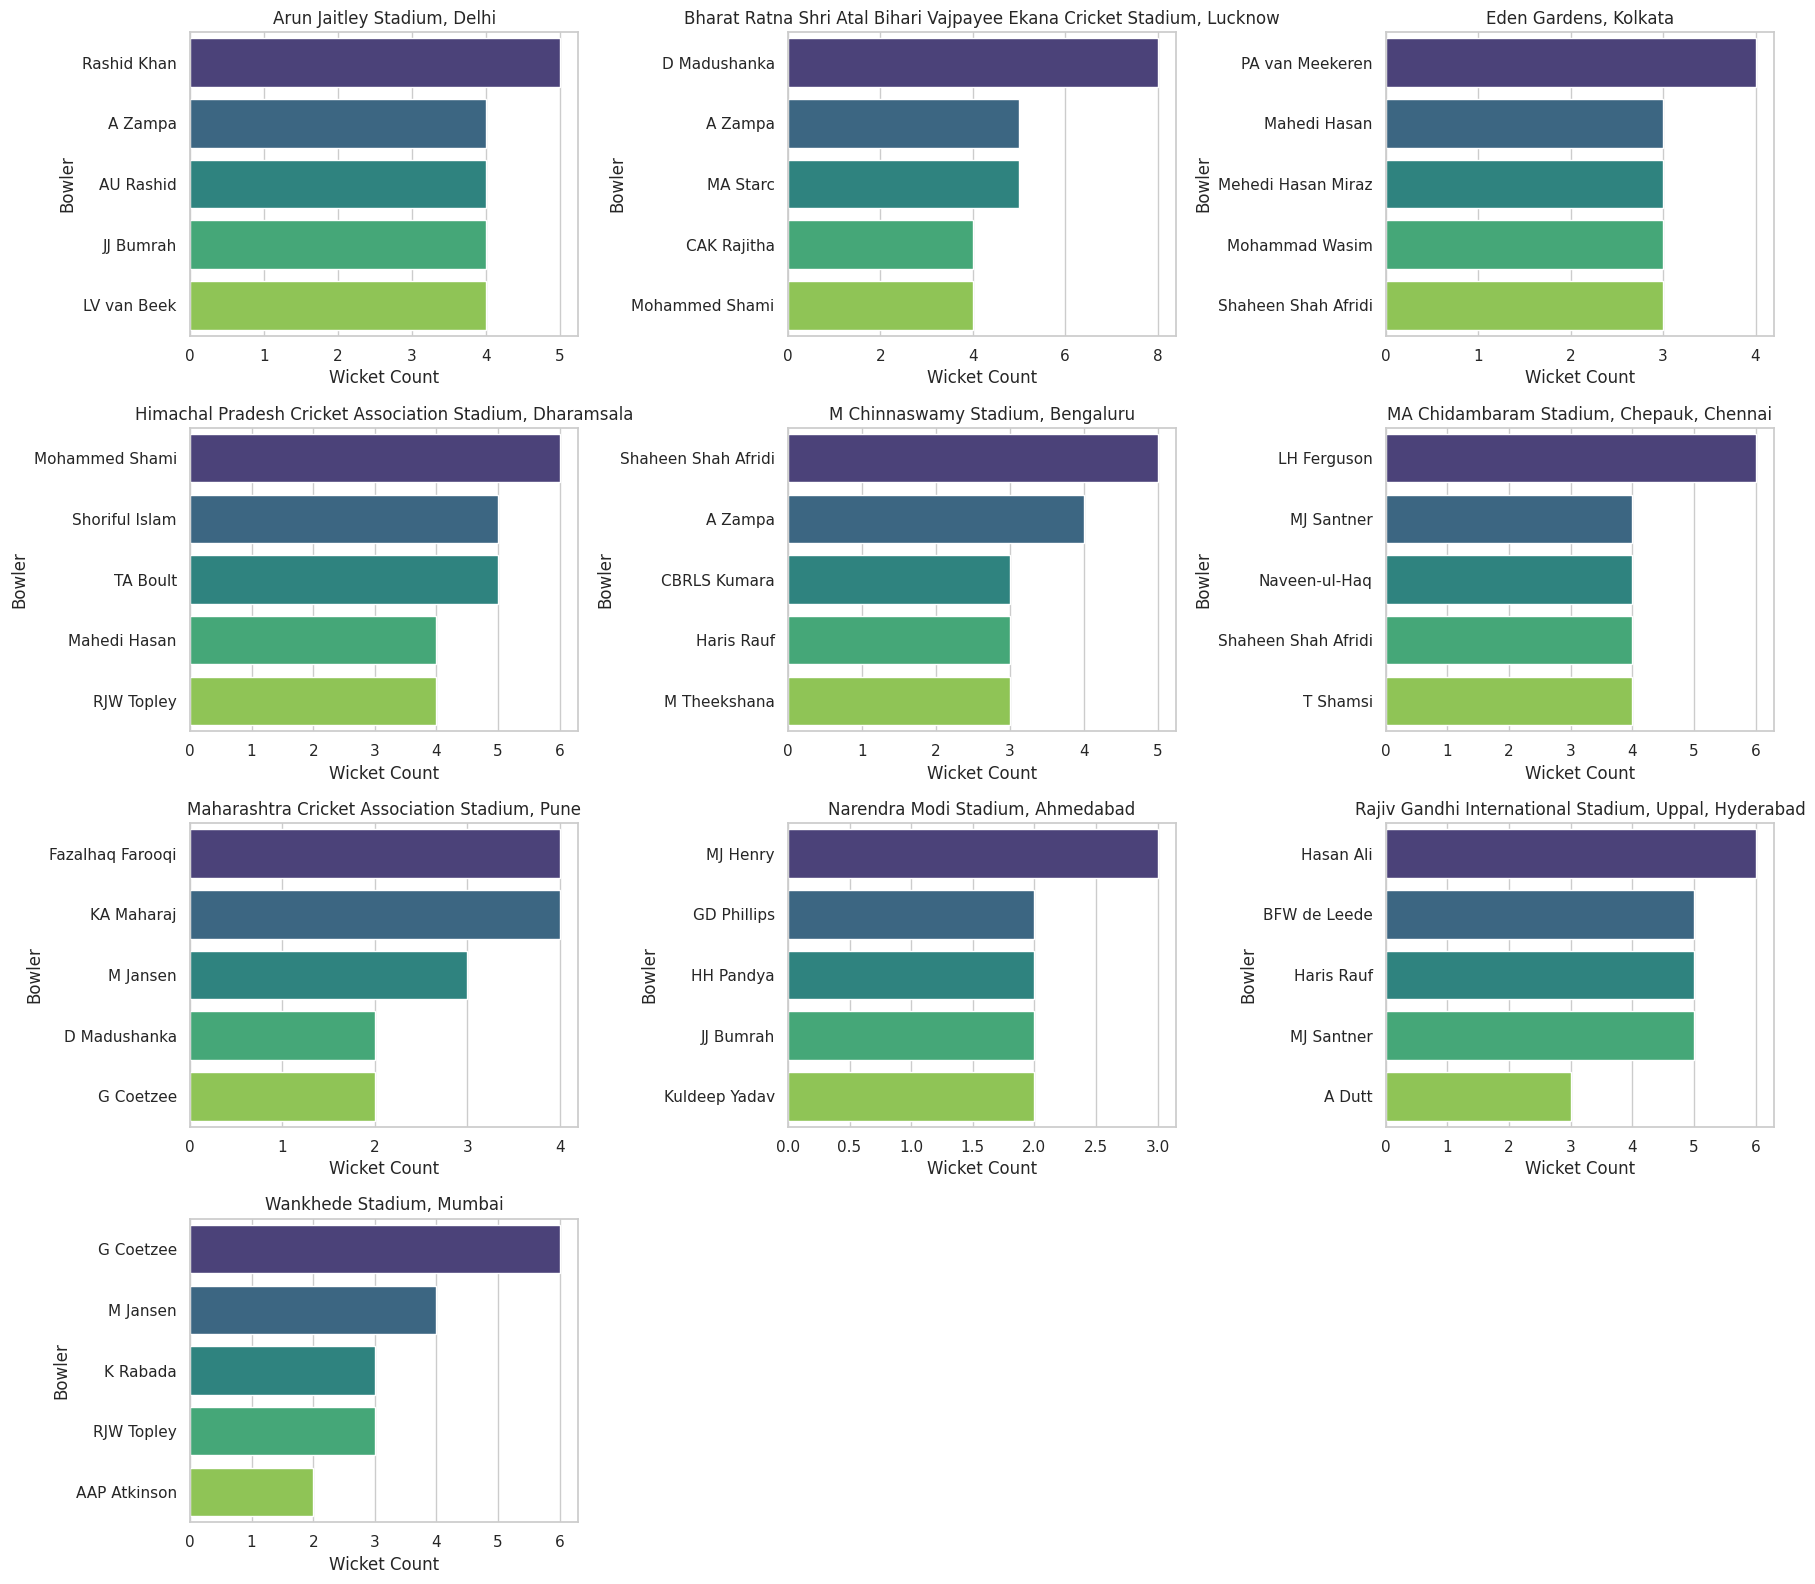

In [ ]:
wickets = deliveries[deliveries['wicket_type'].notna()]
venue_wickets = wickets.groupby(['venue', 'bowler']).size().reset_index(name='wicket_count')
top5_bowlers=venue_wickets.groupby('venue').apply(lambda x: x.nlargest(5, 'wicket_count')).reset_index(drop=True)

sns.set(style="whitegrid")

num_unique_venues = len(top5_bowlers['venue'].unique())

num_rows = (num_unique_venues + 2) // 3

plt.figure(figsize=(18, 4 * num_rows))

for idx, venue in enumerate(top5_bowlers['venue'].unique()):
    venue_data = top5_bowlers[top5_bowlers['venue'] == venue]
    plt.subplot(num_rows, 3, idx + 1)

    sns.barplot(x='wicket_count', y='bowler', data=venue_data, palette='viridis')
    plt.title(venue)
    plt.xlabel('Wicket Count')
    plt.ylabel('Bowler')
    plt.tight_layout()

# Show the plot
plt.show()

* **This code generates the number of wins by cricket teams at different venues. Each venue is represented on the x-axis, with stacked bars displaying team-wise wins through color differentiation. The visualization offers insights into team performances across venues, highlighting their success levels at specific cricket grounds.**

<Figure size 1200x600 with 0 Axes>

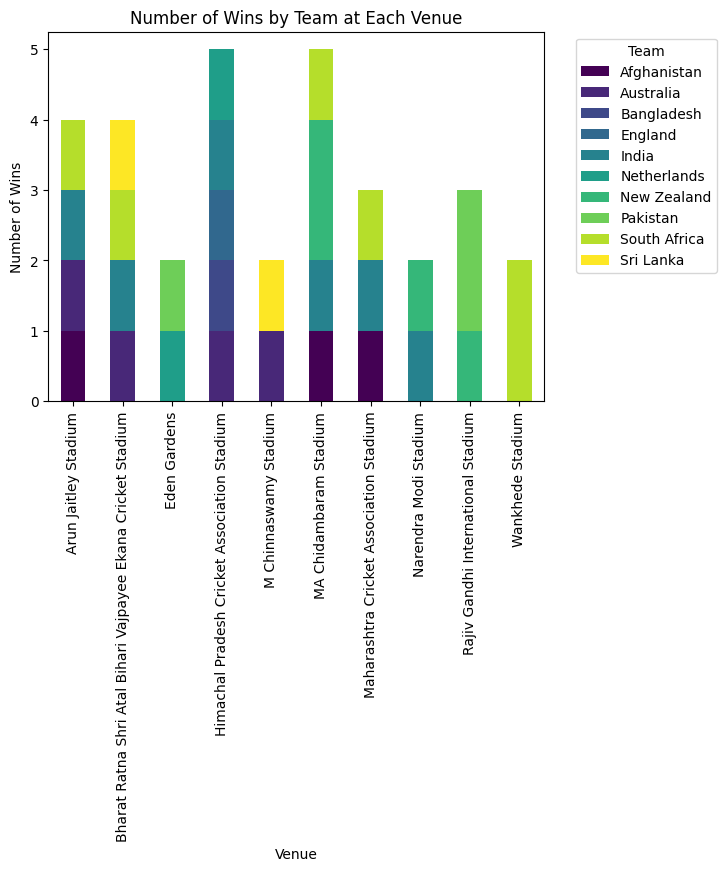

In [ ]:
# Count the number of wins for each team at each venue
venue_team_wins = matches.groupby(['venue', 'winner'])['winner'].count().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
venue_team_wins.plot(kind='bar', stacked=True, colormap='viridis')
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Team at Each Venue')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


* **Below code visualizes the count of matches won by chasing (chase) versus defending (defend) at different cricket venues using a grouped bar chart. It compares the frequency of match results—chase or defend—at various venues to showcase the trend of winning styles across different grounds.**

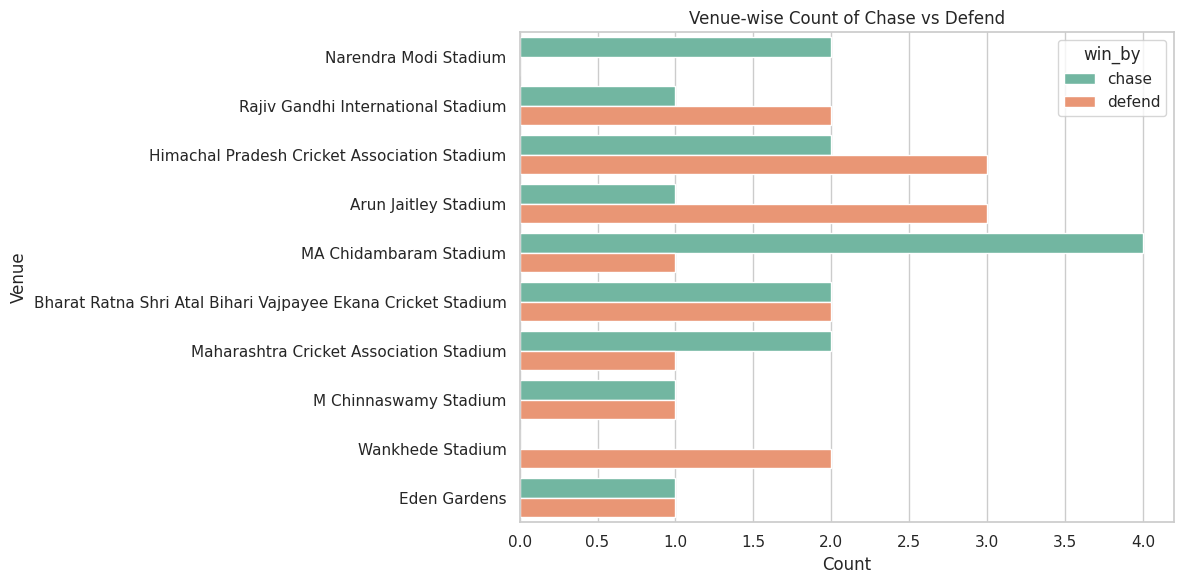

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

venue_wise_wins = matches[['venue', 'winner_runs', 'winner_wickets']].copy()

venue_wise_wins['win_by'] = np.where(matches['winner_runs'].isna(), 'chase', 'defend')

venue_wise_wins.drop(['winner_runs', 'winner_wickets'], axis=1, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(y='venue', hue='win_by', data=venue_wise_wins, palette='Set2')
plt.title('Venue-wise Count of Chase vs Defend')
plt.xlabel('Count')
plt.ylabel('Venue')

# Show the plot
plt.tight_layout()
plt.show()


*  **Below code displays the percentage of wins for each team, with slices representing different teams and their proportionate share of total victories. The 'viridis' color palette distinguishes each team's slice, showcasing their relative success in the matches analyzed.**

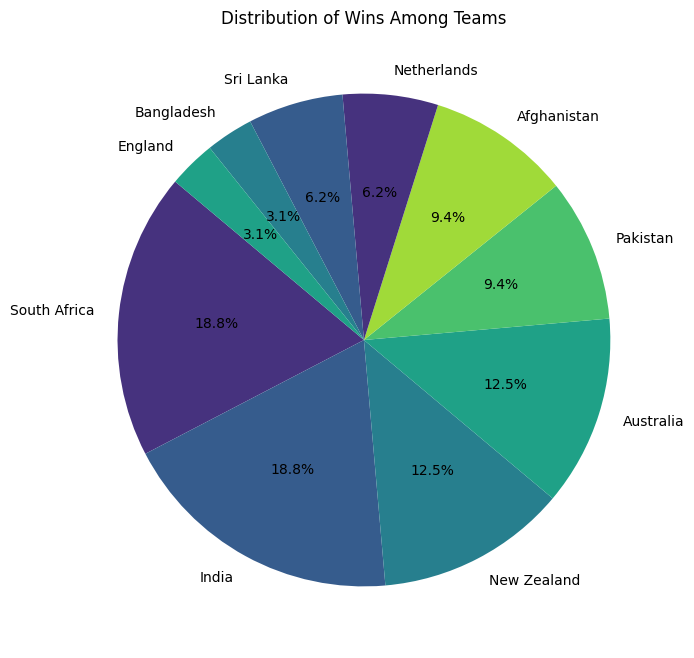

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of wins for each team
team_wins = matches['winner'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(team_wins, labels=team_wins.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Wins Among Teams')
plt.show()


* **Below code explores if the team winning the coin toss also won the cricket match. The plot shows how often the toss winner ended up winning the game versus when they didn't. It helps understand if winning the toss influences the match outcome.**

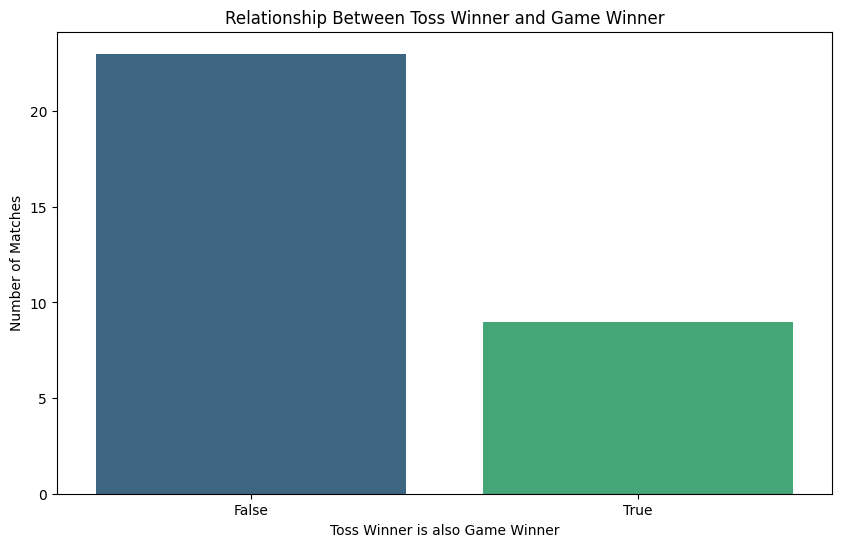

In [ ]:
matches['toss_and_game_winner'] = (matches['toss_winner'] == matches['winner'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_and_game_winner', data=matches, palette='viridis')
plt.xlabel('Toss Winner is also Game Winner')
plt.ylabel('Number of Matches')
plt.title('Relationship Between Toss Winner and Game Winner')
plt.show()

* **This code visualizes the relationship between the toss decision (choosing to bat or bowl) and the game winner in cricket matches. The count plot showcases the number of matches won based on the toss decision, with colors representing different game winners. It helps understand if a specific toss decision correlates with a higher likelihood of winning the match.**

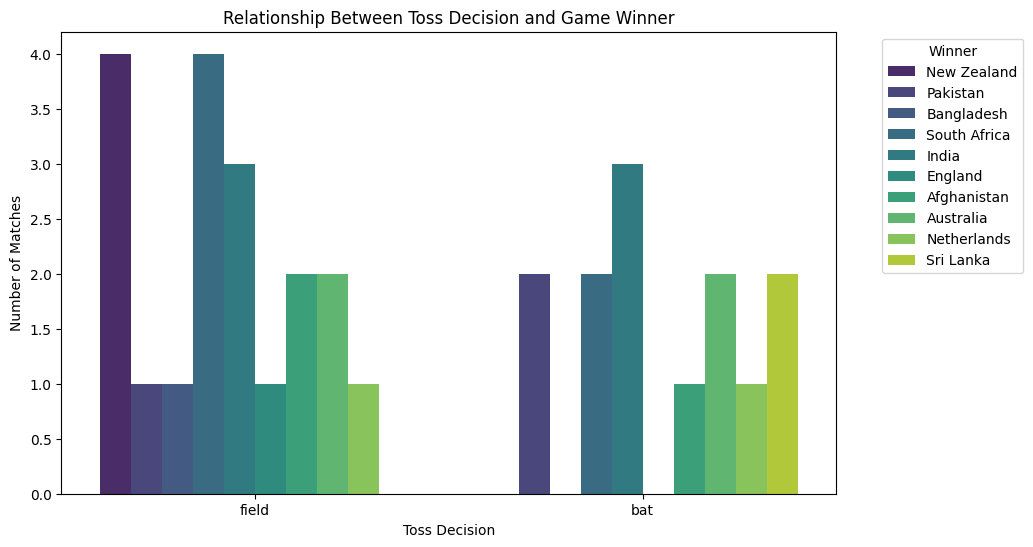

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', hue='winner', data=matches, palette='viridis')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.title('Relationship Between Toss Decision and Game Winner')
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* **This code analyzes the distribution of different wicket types in cricket matches. It counts the occurrences of various wicket types (like bowled, caught, lbw, etc.). The resulting bar plot visualizes the frequency of each wicket type, providing an overview of how often different modes of dismissals occur in cricket.**

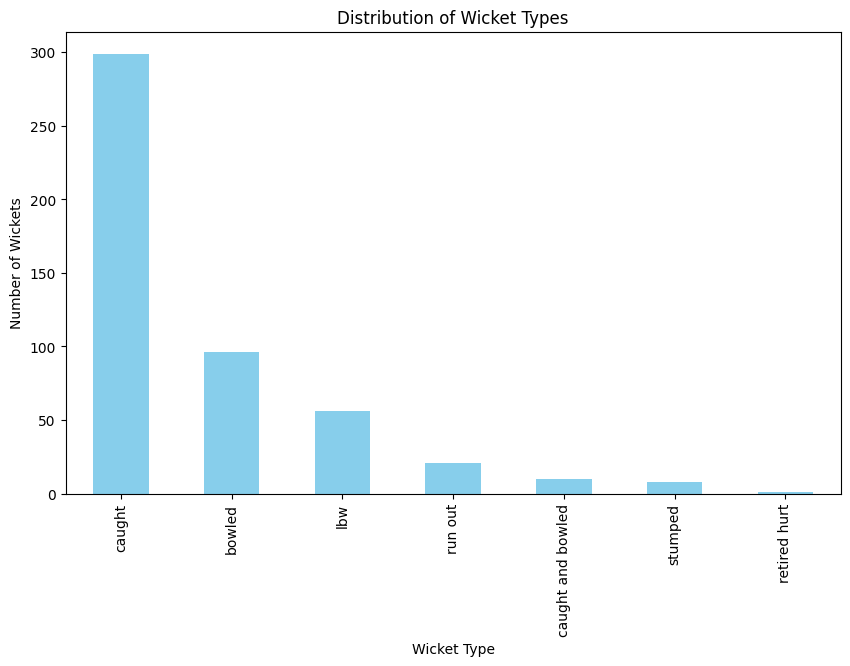

In [ ]:
# Count the occurrences of each wicket type
wicket_counts = deliveries['wicket_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
wicket_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Wicket Type')
plt.ylabel('Number of Wickets')
plt.title('Distribution of Wicket Types')
plt.show()

* **Below code snippet performs a dual analysis of both batting and bowling performances in cricket. The first part computes and displays the batting average for each team, showing their efficiency in scoring runs against different opponents. The second part calculates and visualizes the bowling average for each team, revealing their effectiveness in taking wickets and limiting opposition runs. Both analyses provide insights into teams' strengths and weaknesses in both batting and bowling aspects of the game.**

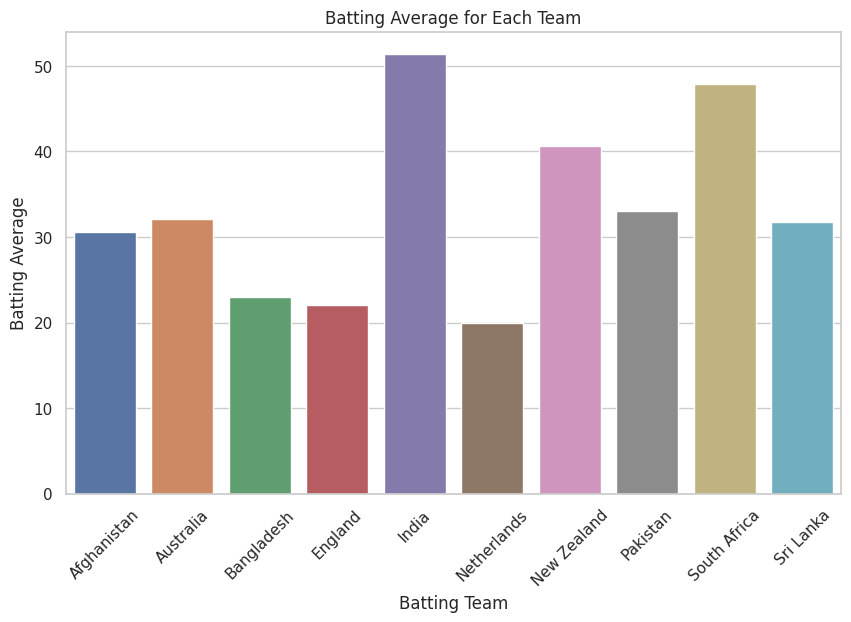

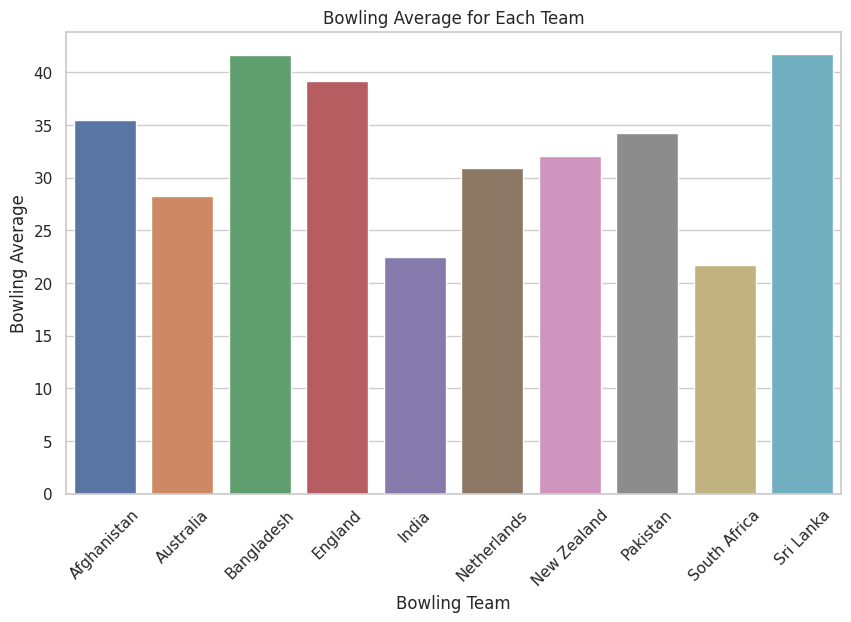

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'deliveries'
# You might need to load your data into a DataFrame using pd.read_csv or another method.

# Create a DataFrame with relevant columns for batting performance
batting_data = deliveries.groupby('batting_team').agg({
    'runs_off_bat': 'sum',
    'player_dismissed': 'count',
    'extras': 'sum'
}).reset_index()

# Calculate batting averages
batting_data['batting_average'] = batting_data['runs_off_bat'] / batting_data['player_dismissed']

# Visualize Batting Average
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_team', y='batting_average', data=batting_data)
plt.title('Batting Average for Each Team')
plt.xlabel('Batting Team')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()

# Create a DataFrame with relevant columns for bowling performance
bowling_data = deliveries.groupby('bowling_team').agg({
    'runs_off_bat': 'sum',
    'wicket_type': lambda x: x.notnull().sum(),
    'extras': 'sum'
}).reset_index()

# Calculate bowling averages
bowling_data['bowling_average'] = bowling_data['runs_off_bat'] / bowling_data['wicket_type']

# Visualize Bowling Average
plt.figure(figsize=(10, 6))
sns.barplot(x='bowling_team', y='bowling_average', data=bowling_data)
plt.title('Bowling Average for Each Team')
plt.xlabel('Bowling Team')
plt.ylabel('Bowling Average')
plt.xticks(rotation=45)
plt.show()

# Identify teams with the highest and lowest averages in batting
highest_batting_average_team = batting_data.loc[batting_data['batting_average'].idxmax()]
lowest_batting_average_team = batting_data.loc[batting_data['batting_average'].idxmin()]

# Identify teams with the highest and lowest averages in bowling
highest_bowling_average_team = bowling_data.loc[bowling_data['bowling_average'].idxmax()]
lowest_bowling_average_team = bowling_data.loc[bowling_data['bowling_average'].idxmin()]



* **This dataset contains information regarding the rankings of cricket teams as determined by the International Cricket Council (ICC). These rankings are often based on various factors such as recent performance, matches played, and outcomes against different opponents.**

In [ ]:
icc_rankings = pd.read_csv(datasets_path+'icc_rankings.csv')
icc_rankings

,Pos,Team,Matches,Points,Rating
0,1,India,52,"6,290",121
1,2,Australia,38,"4,318",114
2,3,South Africa,32,"3,550",111
3,4,Pakistan,35,"3,874",111
4,5,New Zealand,41,"4,189",102
5,6,England,36,"3,509",97
6,7,Sri Lanka,46,"4,082",89
7,8,Bangladesh,43,"3,772",88
8,9,Afghanistan,28,"2,408",86
9,14,Netherlands,35,"1,445",41


In [ ]:
historical_matches = pd.read_csv(datasets_path+'historical_matches.csv')
historical_matches.head()

,Date,Team_1,Team_2,Winner,Margin,Ground,City
0,2015-01-08,Afghanistan,Scotland,Afghanistan,8 wickets,ICC Academy,Dubai
1,2015-01-11,New Zealand,Sri Lanka,New Zealand,3 wickets,Hagley Oval,Christchurch
2,2015-01-12,Ireland,Scotland,Ireland,3 wickets,Dubai International Cricket Stadium,NaN
3,2015-01-14,Afghanistan,Scotland,Scotland,150 runs,Sheikh Zayed Stadium,Abu Dhabi
4,2015-01-15,New Zealand,Sri Lanka,Sri Lanka,6 wickets,Seddon Park,Hamilton


 * **Below code cleans the dataset by removing unnecessary columns and rows with missing 'Winner' values, presenting the resulting filtered historical match data for analysis or modeling**

In [ ]:
historical_matches = pd.read_csv(datasets_path+'historical_matches.csv')
# print(historical_matches['City'].nunique())
worldcup_teams = list(points_table['Team'].unique())
worldcup_grounds = list(matches['venue'].unique())
worldcup_cities = list(matches['city'].unique())
mask = (historical_matches['Team_1'].isin(worldcup_teams)) & (historical_matches['Team_2'].isin(worldcup_teams)) & (historical_matches['City'].isin(worldcup_cities))
cleaned_historical_matches = historical_matches[mask]
cleaned_historical_matches = cleaned_historical_matches.drop(['Date', 'Margin', 'Ground'], axis=1)
cleaned_historical_matches = cleaned_historical_matches.dropna(subset=['Winner'])
cleaned_historical_matches = cleaned_historical_matches.reset_index(drop=True)
cleaned_historical_matches.head()

,Team_1,Team_2,Winner,City
0,India,South Africa,India,Chennai
1,India,South Africa,South Africa,Mumbai
2,India,New Zealand,New Zealand,Delhi
3,India,England,India,Pune
4,India,England,England,Kolkata


# MODEL BUILDING

In [ ]:
# Import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
historical_matches = pd.read_csv(datasets_path+'historical_matches.csv')
historical_matches.head()

,Date,Team_1,Team_2,Winner,Margin,Ground,City
0,2015-01-08,Afghanistan,Scotland,Afghanistan,8 wickets,ICC Academy,Dubai
1,2015-01-11,New Zealand,Sri Lanka,New Zealand,3 wickets,Hagley Oval,Christchurch
2,2015-01-12,Ireland,Scotland,Ireland,3 wickets,Dubai International Cricket Stadium,NaN
3,2015-01-14,Afghanistan,Scotland,Scotland,150 runs,Sheikh Zayed Stadium,Abu Dhabi
4,2015-01-15,New Zealand,Sri Lanka,Sri Lanka,6 wickets,Seddon Park,Hamilton


In [ ]:
Winscore = pd.read_csv(datasets_path+'GroundWinScore.csv')
Winscore

,Ground,South Africa,India,Australia,New Zealand,Pakistan,Afghanistan,Sri Lanka,Netherlands,Bangladesh,England
0,Chennai,0.50,0.60,0.33,1.00,0.00,0.50,0.33,0.33,0.00,0.33
1,Mumbai,1.00,0.50,0.67,1.00,0.33,0.00,0.00,0.33,0.00,0.00
2,Delhi,0.50,0.50,1.00,1.00,0.33,0.50,0.00,0.00,1.00,0.00
3,Pune,1.00,0.71,1.00,0.00,0.33,1.00,0.00,0.00,0.00,0.40
4,Kolkata,0.00,0.75,0.00,0.33,0.50,0.33,0.00,1.00,0.00,1.00
5,Bengaluru,0.33,0.67,0.67,0.50,0.50,0.33,0.50,0.00,0.33,0.00
6,Dharamsala,0.00,0.50,1.00,0.00,0.33,0.00,1.00,1.00,0.50,1.00
7,Hyderabad,0.33,1.00,0.00,0.50,1.00,0.33,0.00,0.00,0.33,0.33
8,Lucknow,1.00,0.50,0.50,0.33,0.33,0.25,0.50,0.00,0.33,0.00
9,Ahmedabad,1.00,1.00,1.00,1.00,0.00,0.00,0.33,0.33,0.33,0.00


In [ ]:
Winscore.loc[Winscore['Ground']=='Ahmedabad','Australia'] = 0.67

* **Below process prepares the historical match dataset by adding win scores for participating teams based on city-specific performance data, aiming to enhance predictive analysis or create a model for the upcoming World Cup matches. The resulting dataset contains match data with updated win scores for each participating team.**

In [ ]:
def addWinScore(history, win):
  history['Team_1_Winscore'] = 0.5
  history['Team_2_Winscore'] = 0.5
  for index, row in history.iterrows():
    city = row['City']
    team_1_winscore = win.loc[Winscore['Ground'] == city, row['Team_1']].values[0]
    team_2_winscore = win.loc[Winscore['Ground'] == city, row['Team_2']].values[0]

    history.at[index, 'Team_1_Winscore'] = team_1_winscore
    history.at[index, 'Team_2_Winscore'] = team_2_winscore
  return history

In [ ]:
worldcup_teams = list(points_table['Team'].unique())
worldcup_cities = list(matches['city'].unique())

mask = (historical_matches['Team_1'].isin(worldcup_teams)) & (historical_matches['Team_2'].isin(worldcup_teams)) & (historical_matches['City'].isin(worldcup_cities))
cleaned_historical_matches = historical_matches[mask].reset_index(drop=True)

cleaned_historical_matches = cleaned_historical_matches.drop(['Date', 'Margin', 'Ground'], axis=1)
cleaned_historical_matches = cleaned_historical_matches.dropna(subset=['Winner'])

cleaned_historical_matches = addWinScore(cleaned_historical_matches, Winscore)
cleaned_historical_matches = cleaned_historical_matches.drop(['City'], axis=1)
print(cleaned_historical_matches.shape)
cleaned_historical_matches.head()

(24, 5)


,Team_1,Team_2,Winner,Team_1_Winscore,Team_2_Winscore
0,India,South Africa,India,0.60,0.5
1,India,South Africa,South Africa,0.50,1.0
2,India,New Zealand,New Zealand,0.50,1.0
3,India,England,India,0.71,0.4
4,India,England,England,0.75,1.0


In [ ]:
ranking = pd.read_csv(datasets_path+'icc_rankings.csv')

* **This code segment prepares the dataset for model building by creating a new column called 'winning_team' that indicates the winning team as '0' (Team 1) or '1' (Team 2). It resets the index, assigns '0' to matches where 'Team_1' wins and '1' where 'Team_2' wins in the 'winning_team' column. The 'Winner' column is dropped, and the 'winning_team' column is cast to integer type for model compatibility.**

In [ ]:
# Building the model
# The prediction label: The winning_team column will show "1" if Team 1 has won, and "2" if Team 2 has won.
cleaned_historical_matches = cleaned_historical_matches.reset_index(drop=True)
cleaned_historical_matches.loc[cleaned_historical_matches['Winner'] == cleaned_historical_matches['Team_1'], 'winning_team']=0
cleaned_historical_matches.loc[cleaned_historical_matches['Winner'] == cleaned_historical_matches['Team_2'], 'winning_team']=1
cleaned_historical_matches = cleaned_historical_matches.drop(['Winner'], axis=1)
cleaned_historical_matches['winning_team']=cleaned_historical_matches['winning_team'].astype(int)
cleaned_historical_matches.head()

,Team_1,Team_2,Team_1_Winscore,Team_2_Winscore,winning_team
0,India,South Africa,0.60,0.5,0
1,India,South Africa,0.50,1.0,1
2,India,New Zealand,0.50,1.0,1
3,India,England,0.71,0.4,0
4,India,England,0.75,1.0,1


In [ ]:
def create_training_input(existing_df):
  teams = list(points_table['Team'].unique())
  teams = sorted(teams)
  new_df = []
  for index,d row in existing_df.iterrows():
    # Create a dictionary to hold the values
    input_dict = {}
    # Set all values to 0
    for team in teams:
        input_dict[f'Team_1_{team}'] = 0
        input_dict[f'Team_2_{team}'] = 0

    # Set the values for the specified teams
    t1 = row['Team_1']
    t2 = row['Team_2']
    input_dict[f'Team_1_{t1}'] = 1
    input_dict[f'Team_2_{t2}'] = 1

    input_dict['Team_1_Winscore'] = row['Team_1_Winscore']
    input_dict['Team_2_Winscore'] = row['Team_2_Winscore']

    input_dict['winning_team'] = row['winning_team']

    new_df.append(input_dict)
  return pd.DataFrame(new_df)

* **Splits the dataset into training (X_train, y_train) and testing (X_test, y_test) sets using a 70-30 split ratio for model evaluation, using the train_test_split function from a machine learning library like scikit-learn**

In [ ]:
# Convert team-1 and team-2 from categorical variables to continous inputs
final = create_training_input(cleaned_historical_matches)
# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
# Divide the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16, 22)
X_test shape: (8, 22)
y_train shape: (16,)
y_test shape: (8,)


In [ ]:
final.head()

,Team_1_Afghanistan,Team_2_Afghanistan,Team_1_Australia,Team_2_Australia,Team_1_Bangladesh,Team_2_Bangladesh,Team_1_England,Team_2_England,Team_1_India,Team_2_India,...,Team_2_New Zealand,Team_1_Pakistan,Team_2_Pakistan,Team_1_South Africa,Team_2_South Africa,Team_1_Sri Lanka,Team_2_Sri Lanka,Team_1_Winscore,Team_2_Winscore,winning_team
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0.60,0.5,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0.50,1.0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0.50,1.0,1
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.71,0.4,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.75,1.0,1


In [ ]:
final = pd.concat([final, ind])

# 1. Logistic Regression Model:

In [ ]:
# Logistic
log_model = LogisticRegression()
X_train = X_train.sort_index(axis=1)
X_test = X_test.sort_index(axis=1)
log_model.fit(X_train, y_train)

train_score = log_model.score(X_train, y_train)
test_score = log_model.score(X_test, y_test)

print("Train Accuracy : "+'%.3f'%(train_score))
print("Test Accuracy : "+'%.3f'%(test_score))

Train Accuracy : 0.812
Test Accuracy : 0.625


# 2. Support Vector Classifier

In [ ]:
# SVC
# Create an SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Calculate accuracy on the training and test sets
svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

# Print the results
print("SVM Train Accuracy: {:.3f}".format(svm_train_score))
print("SVM Test Accuracy: {:.3f}".format(svm_test_score))

SVM Train Accuracy: 0.812
SVM Test Accuracy: 0.625


# 3. Random Forest Model

In [ ]:
# Random Forest
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Calculate accuracy on the training and test sets
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

# Print the results
print("Random Forest Train Accuracy: {:.3f}".format(rf_train_score))
print("Random Forest Test Accuracy: {:.3f}".format(rf_test_score))

Random Forest Train Accuracy: 1.000
Random Forest Test Accuracy: 0.750


### **Below code implements a simple neural network architecture for binary classification, aiming to predict the winning team in cricket matches based on historical match features.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

final = create_training_input(cleaned_historical_matches)
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(units=1, input_dim=X_train.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

y_pred = model.predict(X_test)
y_pred_binary = (y_pred < 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/50
3/3 [==============================] - 0s 6ms/step - loss: 0.7318 - accuracy: 0.4211
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7303 - accuracy: 0.4211
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7292 - accuracy: 0.4211
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7282 - accuracy: 0.4211
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7273 - accuracy: 0.4211
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.7262 - accuracy: 0.4211
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.7253 - accuracy: 0.4211
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7244 - accuracy: 0.4211
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.4211
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 0.7226 - accuracy: 0.4211
Epoch 11/50
3/3 [======================

In [ ]:
ranking = pd.read_csv(datasets_path+'icc_rankings.csv')
fixtures = pd.read_csv(datasets_path+'fixtures.csv')
pred_set = []

In [ ]:
# Create new columns with ranking position of each team
fixtures.insert(1,'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Pos']))
fixtures.insert(2,'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Pos']))
# We only need the group stage games, so slice the dataset and display the last 5 rows
fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Team_1,first_position,second_position,Team_2,Date,Venue,City
40,New Zealand,5.0,7.0,Sri Lanka,2023-11-09T14:00:00+0530,"M. Chinnaswamy Stadium, Bengaluru",Bengaluru
41,South Africa,3.0,9.0,Afghanistan,2023-11-10T14:00:00+0530,"Narendra Modi Stadium, Ahmedabad",Ahmedabad
42,Australia,2.0,8.0,Bangladesh,2023-11-11T10:30:00+0530,"MCA International Stadium, Pune",Pune
43,England,6.0,4.0,Pakistan,2023-11-11T14:00:00+0530,"Eden Gardens, Kolkata",Kolkata
44,India,1.0,14.0,Netherlands,2023-11-12T14:00:00+0530,"M. Chinnaswamy Stadium, Bengaluru",Bengaluru


* **This process constructs a new DataFrame (pred_set) with match details and win scores, likely to be used for predicting match outcomes based on historical team performances.**

In [ ]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
  city = row['City']
  team_1_winscore = Winscore.loc[Winscore['Ground'] == city, row['Team_1']].values[0]
  team_2_winscore = Winscore.loc[Winscore['Ground'] == city, row['Team_2']].values[0]
  pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'Team_1_Winscore':team_1_winscore, 'Team_2_Winscore':team_2_winscore, 'winning_team': None})
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,Team_1_Winscore,Team_2_Winscore,winning_team
0,England,New Zealand,0.00,1.0,None
1,Pakistan,Netherlands,1.00,0.0,None
2,Bangladesh,Afghanistan,0.50,0.0,None
3,Sri Lanka,South Africa,0.00,0.5,None
4,Australia,India,0.33,0.6,None


* This code converts team columns into dummy variables, drops the 'winning_team' column, and sorts columns for prediction in a format compatible with machine learning models for match outcome prediction.

In [ ]:
# Get, dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['Team_1','Team_2'], columns=['Team_1','Team_2'])
pred_set = pred_set.drop(['winning_team'], axis=1)
pred_set = pred_set.sort_index(axis=1)
print(pred_set.shape)
pred_set.head()

(45, 22)


,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_Netherlands,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,...,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_Winscore
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.5
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.6


In [ ]:
# Get the results of league matches
def Add_Point(data, key):
  if key in data:
    data[key]+=2
  else:
    data[key]=0

def PredictAndPrintResult(ml_model, data):
  predictions = ml_model.predict(data)
  points = {}
  for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] +" and " + backup_pred_set.iloc[i, 0])
    if predictions[i] > 0.6:
      winner = backup_pred_set.iloc[i,1]
      print("Winner:"+ winner)
      print("Winning Chances : "+str('%.2f' %(predictions[i][0]*100))+' %')
    else:
      winner = backup_pred_set.iloc[i,0]
      print("Winner:"+ winner)
      print("Winning Chances : "+str('%.2f'%((1.1-predictions[i][0])*100))+' %')
    Add_Point(points, winner)
    print("")
  return points

# print("Logistic Regression ### \n\n")
# log_reg_points = PredictAndPrintResult(model, pred_set)
# print("SVM  ### \n\n")
# svm_points = PredictAndPrintResult(svm_model, pred_set)
# print("Random Forest ### \n\n")
# rf_points = PredictAndPrintResult(rf_model, pred_set)

print("Neural Network ### \n\n")
points = PredictAndPrintResult(model, pred_set)

Neural Network ### 


2/2 [==============================] - 0s 7ms/step
New Zealand and England
Winner:New Zealand
Winning Chances : 70.02 %

Netherlands and Pakistan
Winner:Pakistan
Winning Chances : 77.02 %

Afghanistan and Bangladesh
Winner:Afghanistan
Winning Chances : 62.47 %

South Africa and Sri Lanka
Winner:Sri Lanka
Winning Chances : 70.32 %

India and Australia
Winner:Australia
Winning Chances : 59.42 %

Netherlands and New Zealand
Winner:New Zealand
Winning Chances : 84.49 %

Bangladesh and England
Winner:England
Winning Chances : 58.69 %

Sri Lanka and Pakistan
Winner:Pakistan
Winning Chances : 82.40 %

Afghanistan and India
Winner:India
Winning Chances : 63.47 %

South Africa and Australia
Winner:Australia
Winning Chances : 62.10 %

Bangladesh and New Zealand
Winner:New Zealand
Winning Chances : 80.02 %

Pakistan and India
Winner:India
Winning Chances : 71.50 %

Afghanistan and England
Winner:Afghanistan
Winning Chances : 68.28 %

Sri Lanka and Australia
Winner:Australia


In [ ]:
sorted_teams = sorted(points.items(), key=lambda x: x[1], reverse=True)
print(sorted_teams)
# print("Top 4 Teams using Neural Network Sequential layers models:")
top_4_teams = [team[0] for team in sorted_teams[:4]]
top_4_teams

[('Australia', 14), ('India', 14), ('New Zealand', 12), ('Pakistan', 8), ('Afghanistan', 8), ('England', 8), ('South Africa', 4), ('Netherlands', 2), ('Sri Lanka', 0), ('Bangladesh', 0)]


['Australia', 'India', 'New Zealand', 'Pakistan']

In [ ]:
semi = [('India', 'New Zealand', 'Mumbai'),('South Africa','Australia', 'Kolkata')]
semi

[('India', 'New Zealand', 'Mumbai'), ('South Africa', 'Australia', 'Kolkata')]

* This two Functions basically cleans and transforms the string input into the numerical form in such way it can be given to model.

In [ ]:
def create_normal_input(team_1, team_2, ground):
  t1_winscore = Winscore.loc[Winscore['Ground'] == ground, team_1].values[0]
  t2_winscore = Winscore.loc[Winscore['Ground'] == ground, team_2].values[0]
  input_dict = {'Team_1':team_1, 'Team_2':team_2, 'Team_1_Winscore':t1_winscore, 'Team_2_Winscore':t2_winscore, 'winning_team':None}
  input_df = pd.DataFrame([input_dict])
  return input_df

def clean_and_predict(matches, model):
  for mat in matches:
    inp = create_normal_input(mat[0], mat[1], mat[2])
    X = create_training_input(inp)
    X = X.drop('winning_team', axis=1)
    # print(X.columns)
    # print(X_train.columns)
    # X = X[X_train.columns]
    y = model.predict(X)
    print(mat[0]+ ' vs '+ mat[1]+ ' at '+mat[2])
    if y < 0.5:
      print('winner : '+mat[1])
      print("Winning Chances : "+str('%.2f'%((1-y)*100))+' %\n')
    else:
      print('winner : '+mat[0])
      print("Winning Chances : "+str('%.2f'%(y*100))+' %\n')


print('Prediction of Semi Finals \n')
clean_and_predict(semi, model)

Prediction of Semi Finals 

1/1 [==============================] - 0s 29ms/step
India vs New Zealand at Mumbai
winner : India
Winning Chances : 59.39 %

1/1 [==============================] - 0s 20ms/step
South Africa vs Australia at Kolkata
winner : Australia
Winning Chances : 50.25 %



### **India vs New Zealand at Mumbai**

The highly anticipated semi-final clash between India and New Zealand is set to take place in Mumbai. According to the latest predictions from our model, the odds are in favor of **India**, with a winning chance of **59.39%**. Cricket enthusiasts can expect an intense battle between these two cricketing giants as they vie for a spot in the final.

### **South Africa vs Australia at Kolkata**

In another exciting semi-final matchup, South Africa will face off against Australia in Kolkata. According to the model's analysis, **Australia** emerges as the predicted winner, with a winning chance of **50.25%**. Fans can brace themselves for a thrilling encounter as these two formidable teams compete for a chance to play in the championship match.


## Predicted Finalists

After careful analysis and predictions from our model, it anticipates that the finalists for the championship clash will be:

- **India vs New Zealand** at Mumbai
  - **Winner:** India
  - **Winning Chances:** 59.39%

- **South Africa vs Australia** at Kolkata
  - **Winner:** Australia
  - **Winning Chances:** 50.25%

The model suggests that India and Australia are the frontrunners to reach the final, setting the stage for what promises to be an exhilarating championship showdown.


In [ ]:
final = [('India', 'Australia', 'Ahmedabad' )]

print('Prediction of Finals\n')
clean_and_predict(final, model)

Prediction of Finals

1/1 [==============================] - 0s 34ms/step
India vs Australia at Ahmedabad
winner : India
Winning Chances : 54.82 %



## Predicted Finals

After intense semi-final clashes, our model predicts that the championship showdown will be between:

- **India vs Australia** at Ahmedabad
  - **Winner:** India
  - **Winning Chances:** 54.82%

The model suggests that India is the predicted winner with a winning chance of 54.82%. Cricket enthusiasts can expect an electrifying final match as India and Australia battle for the championship title.


# Pickle

In [ ]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pickle

In [ ]:
with open('clean_and_predict.pkl', 'wb') as function_file:
    pickle.dump(clean_and_predict, function_file)

In [ ]:
with open('model.pkl', 'wb') as function_file:
    pickle.dump(model, function_file)

In [ ]:
model.save('t02_cwc23_model.h5')